# Chapter 1 - Getting started with Python Machine Learning Introduction
## Introduction to NumPy, SciPy, and matplotlib
## Installing with Python

In [1]:
import sys
sys.version

'3.9.1 (tags/v3.9.1:1e5d33e, Dec  7 2020, 17:08:21) [MSC v.1927 64 bit (AMD64)]'

## Chewing data efficiently with NumPy and intelligently with SciPy
### Learning NumPy

In [2]:
import numpy as np
np.version.full_version

'1.20.1'

In [3]:
a = np.array([0,1,2,3,4,5])
a

array([0, 1, 2, 3, 4, 5])

In [4]:
a.ndim

1

In [5]:
a.shape

(6,)

Transforming this array to a two-dimensional matrix

In [6]:
b = a.reshape((3,2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [7]:
b.ndim

2

In [8]:
b.shape

(3, 2)

Modifying values

In [9]:
b[1][0] = 77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [10]:
a

array([ 0,  1, 77,  3,  4,  5])

True copy

In [11]:
c = a.reshape((3,2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [12]:
c[0][0] = -99

In [13]:
a

array([ 0,  1, 77,  3,  4,  5])

In [14]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

a[0] is not changed. c and a are totally independent copies.

In [15]:
d = np.array([1,2,3,4,5])
d*2

array([ 2,  4,  6,  8, 10])

In [16]:
d**2

array([ 1,  4,  9, 16, 25], dtype=int32)

Works differently for ordinary Python lists:

In [17]:
[1,2,3,4,5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [18]:
[1,2,3,4,5]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

### Indexing

In [19]:
a[np.array([2,3,4])]

array([77,  3,  4])

In [20]:
a>4

array([False, False,  True, False, False,  True])

In [21]:
a[a>4]

array([77,  5])

Trimming outliers:

In [22]:
a[a>4] = 4
a

array([0, 1, 4, 3, 4, 4])

In [23]:
a.clip(0,4)

array([0, 1, 4, 3, 4, 4])

In [24]:
a.clip(1,3)

array([1, 1, 3, 3, 3, 3])

### Handling non-existing values

In [25]:
c = np.array([1,2,np.NAN,3,4]) #let's pretend we have read this from a text file
c

array([ 1.,  2., nan,  3.,  4.])

In [26]:
np.isnan(c)

array([False, False,  True, False, False])

In [27]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [28]:
np.mean(c[~np.isnan(c)])

2.5

### Comparing the runtime

In [29]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',number=10000)
naive_np_sec = timeit.timeit('sum(na*na)',setup="import numpy as np; na=np.arange(1000)",number=10000)
good_np_sec = timeit.timeit('na.dot(na)',setup="import numpy as np; na=np.arange(1000)",number=10000)

print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 0.944309 sec
Naive NumPy: 0.774308 sec
Good NumPy: 0.017838 sec


Using NumPy arrays, we no longer have the
incredible flexibility of Python lists, which can hold basically anything.

In [30]:
a = np.array([1,2,3])
a.dtype

dtype('int32')

In [31]:
np.array([1,"stringy"])

array(['1', 'stringy'], dtype='<U11')

In [32]:
np.array([1,"stringy",set([1,2,3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

### Learning SciPy

In [33]:
import scipy as sp
sp.version.full_version

'1.6.1'

In [34]:
sp.dot is np.dot

False

### Our first tiny application of machine learning:
### Reading in the data

In [37]:
data = np.genfromtxt("web_traffic.tsv", delimiter="\t")

In [38]:
print(data[:10])

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00 1.65725549e+03]
 [3.00000000e+00            nan]
 [4.00000000e+00 1.36684644e+03]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00 1.33802002e+03]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00 2.28475415e+03]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]]


In [39]:
print(data.shape)

(743, 2)


### Preprocessing and cleaning the data

In [40]:
x = data[:,0]
y = data[:,1]

In [41]:
np.sum(np.isnan(y))

8

In [42]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

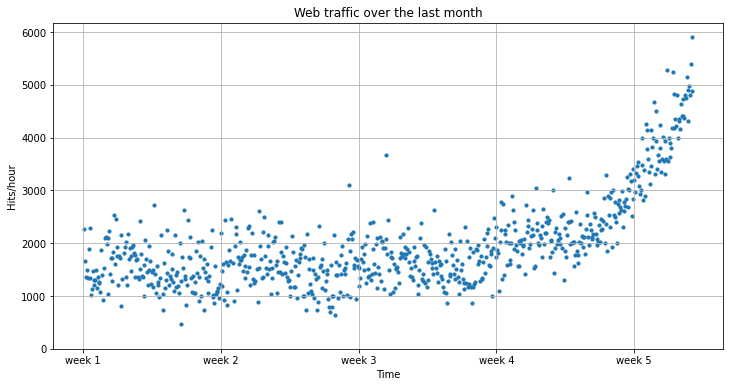

In [100]:
import matplotlib.pyplot as plt
def plot_web_traffic(x, y, models=None, mx=None, ymax=None):
    '''
    Plot the web traffic (y) over time (x).
    If models is given, it is expected to be a list of fitted models,
    which will be plotted as well (used later in this chapter).
    '''
    plt.figure(figsize=(12,6)) # width and height of the plot in inches
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(15)],['week %i' %(w+1) for w in range(15)])
    
    if models:
        colors = ['g', 'k', 'b', 'm', 'r']
        linestyles = ['-', '-.', '--', ':', '-']
        
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
            
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
        
    plt.autoscale()
    if ymax:
        plt.ylim(ymax=ymax)
        
    plt.grid()
    
    plt.ylim(ymin=0)
    
%matplotlib inline
plot_web_traffic(x, y)    

### Before we build our first model
We calculate approximation error as the squared distance of the model's prediction to the real data.

In [46]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)

### Choosing the right model and learning algorithm
Starting with a simple straight line:

In [47]:
fp1 = np.polyfit(x, y, 1)

In [48]:
print("Model parameters: %s" % fp1)

Model parameters: [  2.58462016 996.50674246]


In [49]:
f1 = np.poly1d(fp1)
print(error(f1, x, y))

319531507.0208318


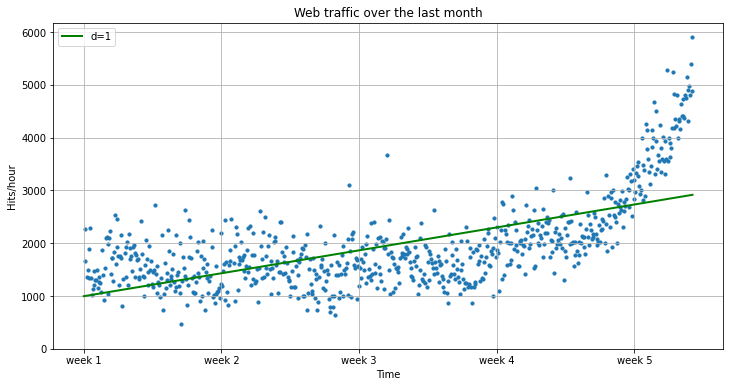

In [101]:
plot_web_traffic(x, y, [f1])

### Toward more complex models
Fitting a more complex model, a polynomial of degree 2.

In [51]:
fp2 = np.polyfit(x, y, 2)

In [52]:
print(fp2)

[ 1.05605675e-02 -5.29774287e+00  1.98466917e+03]


In [53]:
f2 = np.poly1d(fp2)

In [54]:
print(error(f2, x, y))

181347660.75761026


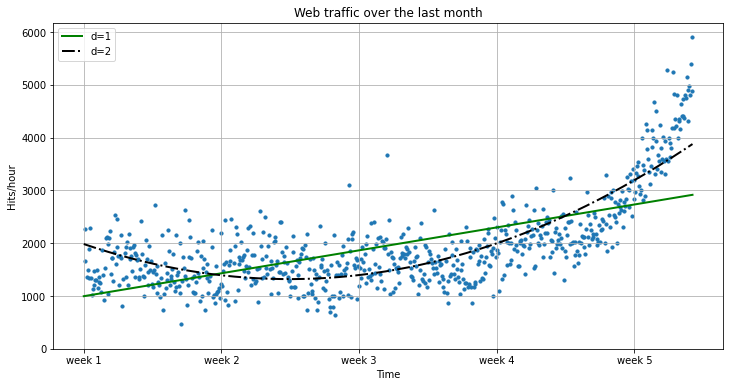

In [102]:
plot_web_traffic(x, y, [f1, f2])

In [56]:
f3 = np.poly1d(np.polyfit(x, y, 3))
f10 = np.poly1d(np.polyfit(x, y, 10))
f100 = np.poly1d(np.polyfit(x, y, 100))

c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


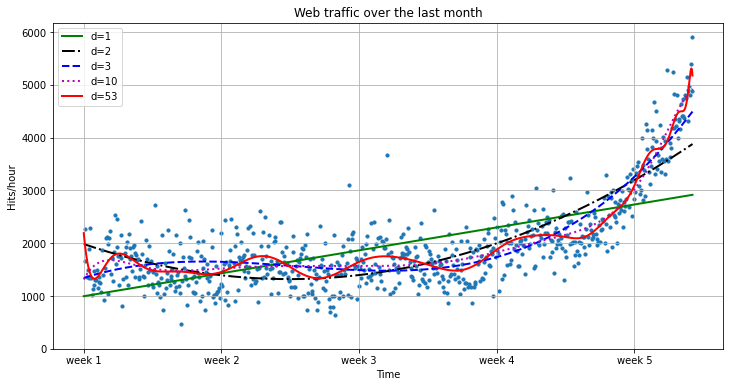

In [103]:
plot_web_traffic(x, y, [f1, f2, f3, f10, f100])

Interestingly, we do not see d = 100 for the polynomial that had been fitted with 100 degrees, but instead d = 53 due to numerical errors.

In [60]:
print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("\td=%i: %f" % (f.order, error(f, x, y)))

Errors for the complete data set:
	d=1: 319531507.020832
	d=2: 181347660.757610
	d=3: 140576460.879682
	d=10: 123426935.751719
	d=53: 110768260.519645


The polynomials of degree 10 and 53 are wildly oscillating that the models are fitted too much to the data. The graph is capturing not only the underlying process, but also the noise. This is called overfitting.
### Stepping back to go forward - another look at our data

In [61]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=134390576.312955


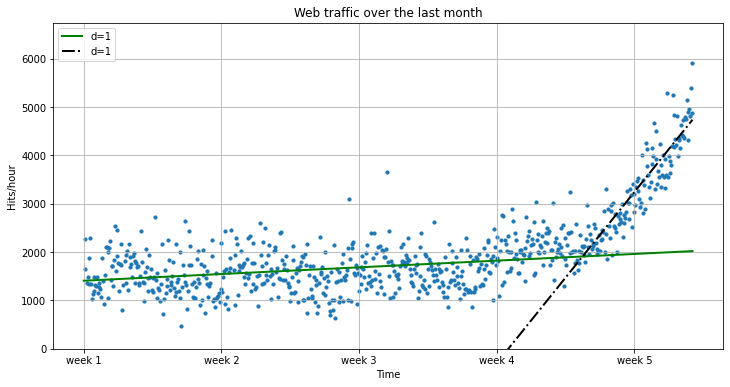

In [104]:
plot_web_traffic(x, y, [fa, fb])

Performing the higher-degree models with the above inflection point:

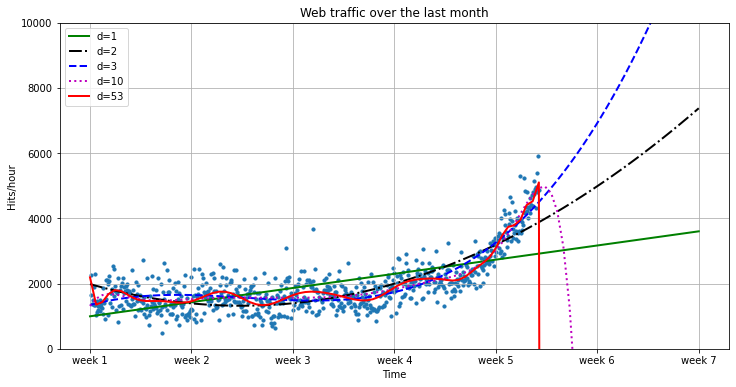

In [105]:
plot_web_traffic(x, y, [f1, f2, f3, f10, f100], mx=np.linspace(0, 6 * 7 * 24, 100), ymax=10000)

c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Errors for only the time after inflection point
	d=1: 22140590.599277
	d=2: 19764355.660566
	d=3: 19762196.404684
	d=10: 18942545.243622
	d=53: 18293754.078161


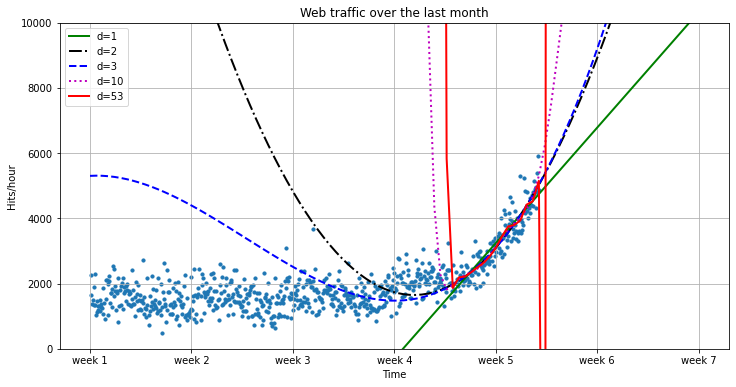

In [106]:
fb1 = np.poly1d(np.polyfit(xb, yb, 1))
fb2 = np.poly1d(np.polyfit(xb, yb, 2))
fb3 = np.poly1d(np.polyfit(xb, yb, 3))
fb10 = np.poly1d(np.polyfit(xb, yb, 10))
fb100 = np.poly1d(np.polyfit(xb, yb, 100))

print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("\td=%i: %f" % (f.order, error(f, xb, yb)))

plot_web_traffic(x, y, [fb1, fb2, fb3, fb10, fb100], mx=np.linspace(0, 6 * 7 * 24, 100), ymax=10000)

### Training and testing

Let's remove, for instance, a certain percentage, say 40%, of the data and train on the remaining one after the inflection point.

In [87]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = np.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = np.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = np.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = np.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = np.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

fbt2(x)= 
         2
0.05867 x - 58.11 x + 1.574e+04
fbt2(x)-100,000= 
         2
0.05867 x - 58.11 x - 8.426e+04
Test errors for only the time after inflection point
Error d=1: 6303543.676668
Error d=2: 5003382.335844
Error d=3: 5055043.015147
Error d=10: 5176534.182409
Error d=53: 5197450.396159


c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\users\praab\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Errors for only the time after inflection point
	d=1: 22140590.599277
	d=2: 19764355.660566
	d=3: 19762196.404684
	d=10: 18942545.243622
	d=53: 18293754.078161


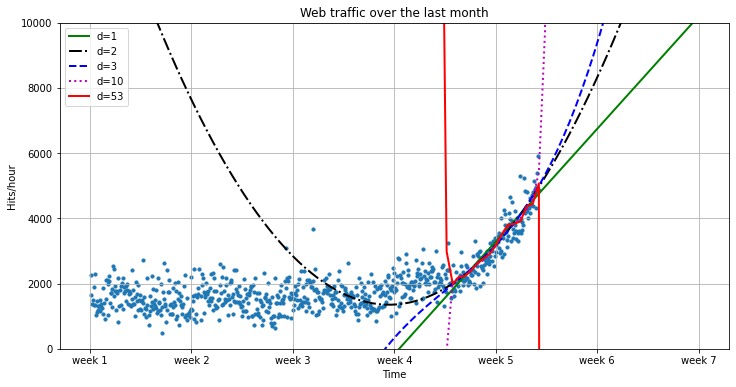

In [107]:
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("\td=%i: %f" % (f.order, error(f, xb, yb)))

plot_web_traffic(x, y, [fbt1, fbt2, fbt3, fbt10, fbt100], mx=np.linspace(0, 6 * 7 * 24, 100), ymax=10000)

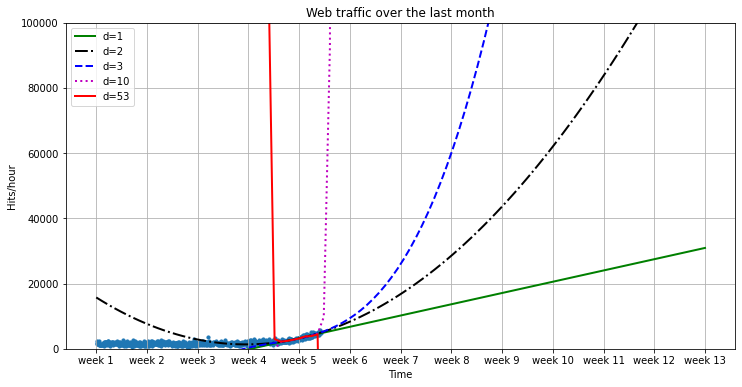

In [108]:
plot_web_traffic(x, y, [fbt1, fbt2, fbt3, fbt10, fbt100], mx=np.linspace(0, 12 * 7 * 24, 100), ymax=100000)

In [111]:
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)

fbt2(x)= 
         2
0.05867 x - 58.11 x + 1.574e+04


In [112]:
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

fbt2(x)-100,000= 
         2
0.05867 x - 58.11 x - 8.426e+04


In [114]:
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)

print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 10.666226
